In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Load the data

In [17]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

all_data = datasets.ImageFolder(root='./Data', transform=transform)

#Split the data
train_size = int(0.9 * len(all_data))
test_size = len(all_data) - train_size

train_data, test_data = random_split(all_data, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [22]:
train_size = len(train_data)
print(f"Training data size: {train_size}")

Training data size: 8145


# Visualize the data

Showing images for label 0


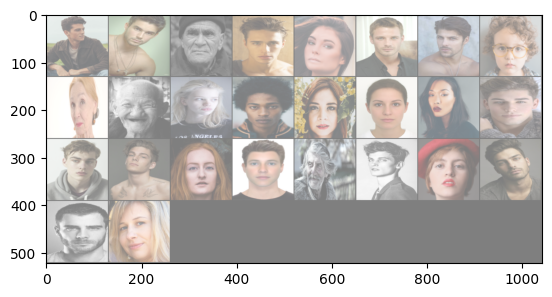

Showing images for label 1


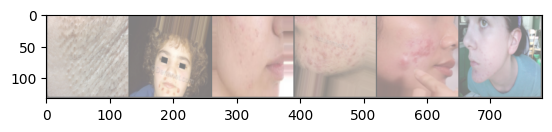

In [18]:

    # Grab some images from your DataLoader
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    images_by_label = {0: [], 1:[]}
    for image, label in zip(images, labels):
        images_by_label[label.item()].append(image)

    def imshow(img):
        img = img / 2 + 0.5
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

    for label, imgs in images_by_label.items():
        print(f"Showing images for label {label}")
        imshow(torchvision.utils.make_grid(torch.stack(imgs)))

In [19]:
from collections import Counter

label_list = [label for _, label in train_data]
label_counter = Counter(label_list)
print(label_counter)


c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Counter({0: 6498, 1: 1647})


In [21]:
print(label_counter[1] / (label_counter[0] + label_counter[1]))

0.2022099447513812


# Model Creation

In [23]:
class AcneNet(nn.Module):
    def __init__(self):
        super(AcneNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64*124*124, 128)
        self.fc2 = nn.Linear(128, 2)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(-1, 64*124*124)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [26]:
model = AcneNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the Model